In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/vortex/isep/project/datasets/gear-box-prediction'):
    for filename in filenames:
        if "Processed Data" in dirname:
            print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


df=pd.DataFrame()
for no in range(10,38):
    temp=pd.read_csv("/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID"+str(no)+"_ProcessedTripData.csv",header= None)
    #print(temp)  
    df=pd.concat([df,temp])

df.columns=['Time','Vehicle Speed','SHIFT','Engine Load','Total Acceleration','Engine RPM','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush']

# Multiply the 'Vehicle Speed' by 3.6 to get km/h
df['Vehicle Speed'] = df['Vehicle Speed'] * 3.6

newdf = df[df.SHIFT != 0]
newdf = newdf.reset_index(drop=True)

# Column SHIFT moved to the last position
column_to_move = 'SHIFT'
columns = [col for col in newdf.columns if col != column_to_move]
newdf = newdf[columns + [column_to_move]]

df = newdf

df.dropna(inplace=True)

# Set the display format to show real numbers, not scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID11_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID32_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID13_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID9_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID26_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID19_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID2_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID33_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID36_ProcessedTripData.csv
/home/vortex

,Time,Vehicle Speed,Engine Load,Total Acceleration,Engine RPM,Pitch,Lateral Acceleration,Passenger Count,Car Load,AC Status,Window Opening,Radio Volume,Rain Intensity,Visibility,Driver Wellbeing,Driver Rush,SHIFT
count,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000
mean,1342.519,46.641,10.357,0.272,2039.619,1.244,-0.021,0.658,4.639,0.086,0.593,3.469,0.152,9.676,6.510,3.016,3.412
std,901.246,24.403,8.100,0.694,553.765,1.896,0.521,0.859,2.165,0.372,1.309,2.105,0.532,0.678,1.058,1.083,1.256
min,7.677,4.773,2.000,-5.101,800.020,-10.549,-5.963,0.000,3.000,0.000,0.000,0.000,0.000,7.000,4.000,0.000,1.000
25%,585.950,28.186,4.122,-0.148,1674.200,0.604,-0.111,0.000,3.000,0.000,0.000,2.000,0.000,10.000,6.000,3.000,2.000
50%,1238.500,42.264,8.054,0.223,1987.300,1.307,-0.006,0.000,3.000,0.000,0.000,4.000,0.000,10.000,7.000,3.000,3.000
75%,1886.900,64.890,13.584,0.626,2292.400,1.970,0.085,1.000,7.000,0.000,0.000,5.000,0.000,10.000,7.000,3.000,5.000
max,4287.900,115.150,69.655,4.523,5680.800,12.277,5.777,4.000,8.000,4.000,6.000,8.000,3.000,10.000,8.000,5.000,5.000


In [3]:
df.head()

,Time,Vehicle Speed,Engine Load,Total Acceleration,Engine RPM,Pitch,Lateral Acceleration,Passenger Count,Car Load,AC Status,Window Opening,Radio Volume,Rain Intensity,Visibility,Driver Wellbeing,Driver Rush,SHIFT
0,60.569,9.987,7.843,-0.173,1306.500,-1.625,1.599,0,3,0,2,6,0,9,5,3,1
1,60.579,9.965,7.826,-0.195,1308.800,-1.642,1.599,0,3,0,2,6,0,9,5,3,1
2,60.589,9.940,7.809,-0.214,1311.100,-1.659,1.595,0,3,0,2,6,0,9,5,3,1
3,60.599,9.910,7.791,-0.231,1313.600,-1.676,1.568,0,3,0,2,6,0,9,5,3,1
4,60.608,9.893,7.774,-0.245,1316.100,-1.693,1.565,0,3,0,2,6,0,9,5,3,1


In [2]:
#CART MODEL without any knowledge
#tree in PNG
# No GridSearchCV take into consideration

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X = df.drop(columns=['SHIFT'])
y = df['SHIFT']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth= 5, min_samples_leaf= 1, min_samples_split=3)
clf.fit(x_train, y_train)

accuracy=clf.score(x_test, y_test)
print("Model Accuracy : "+str(accuracy*100)+" %")

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=['Time','Vehicle Speed','Engine Load','Total Acceleration','Engine RPM','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush'],
                           class_names=[str(i) for i in y.unique()],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format='png', engine='dot')
graph.render("clustering_decision_tree", view=True, cleanup=True)



Model Accuracy : 93.65306870575843 %


'clustering_decision_tree.png'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/vortex/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/vortex/snap/code/common/.cache/gio-modules/libgiolibproxy.so


Visualize cluster values by classes

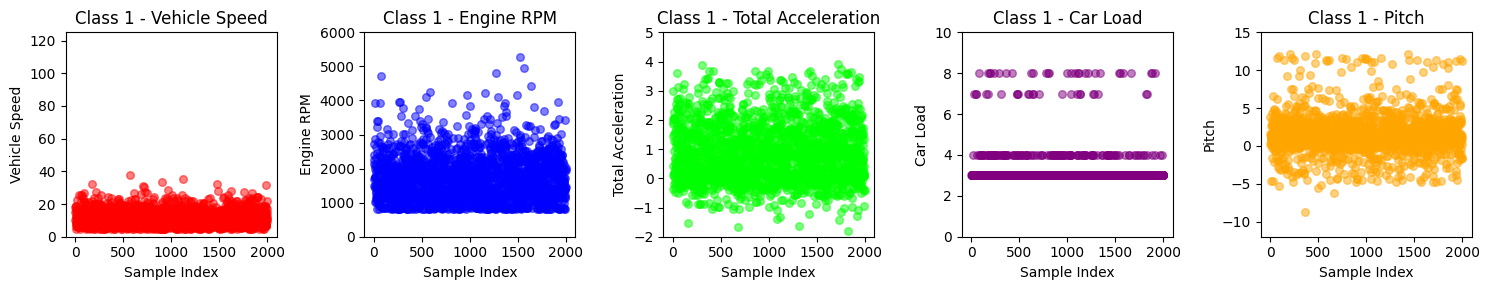

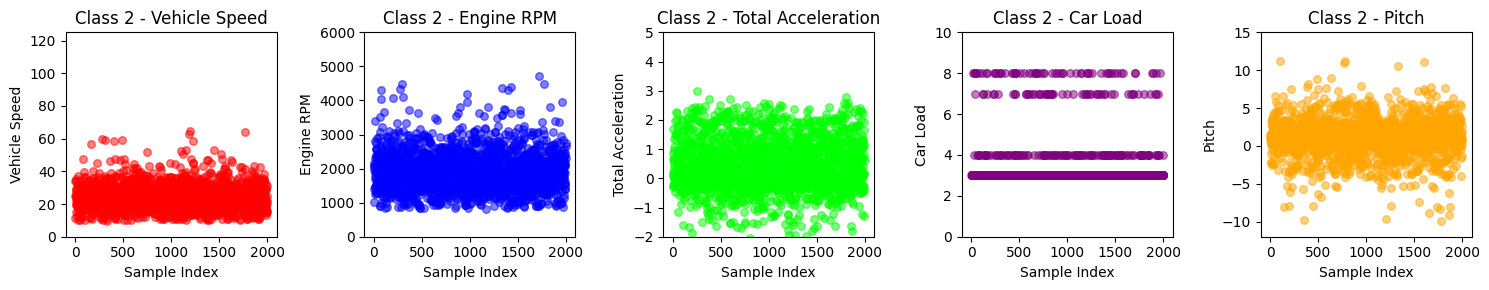

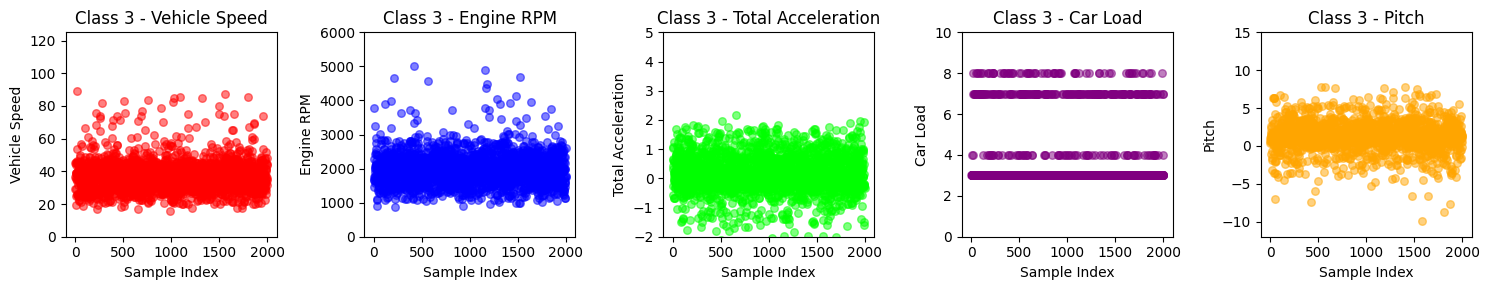

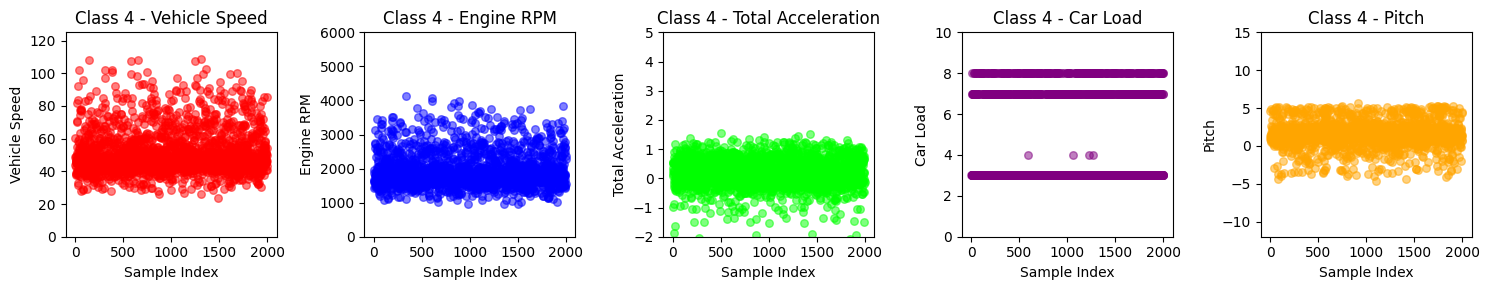

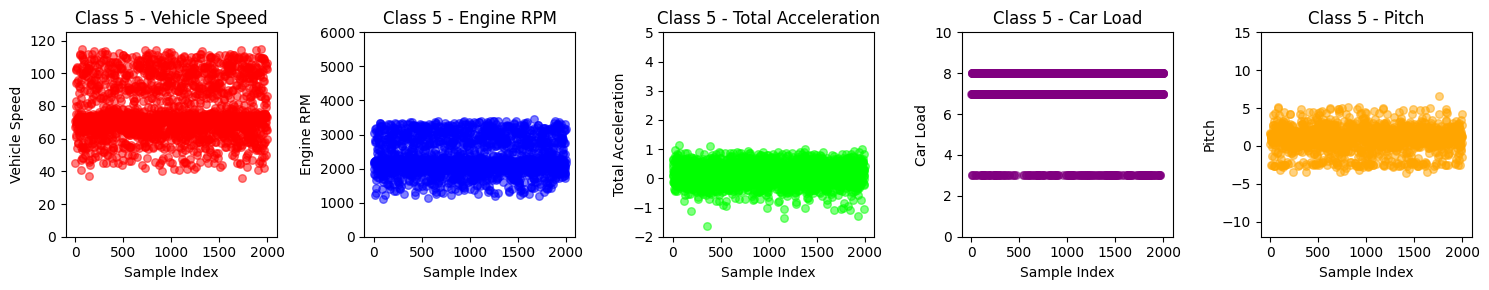

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Assuming you have the classifier `clf` and data X, y as you mentioned
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(x_train, y_train)

class_features = ['Vehicle Speed', 'Engine RPM', 'Total Acceleration', 'Car Load', 'Pitch']
max_points = 2000

x_vals = np.linspace(0, 2000, num=2000)

# Define a dictionary to map features to pastel colors
feature_colors = {
    'Vehicle Speed': '#FFC3A0',  # Pastel orange
    'Engine RPM': '#A0C3FF',    # Pastel blue
    'Total Acceleration': '#A0FFC3',  # Pastel green
    'Car Load': '#FFA0C3',  # Pastel pink
    'Pitch': '#FFEDA0',      # Pastel yellow
}

# Define colors for each class
class_colors = {
    'Vehicle Speed': '#FF0000',  # Red
    'Engine RPM': '#0000FF',  # Blue
    'Total Acceleration': '#00FF00',  # Green
    'Car Load': '#800080',  # Purple
    'Pitch': '#FFA500',  # Orange
}


y_limits_upper = {
    'Vehicle Speed': 125,
    'Engine RPM': 6000,
    'Total Acceleration': 5,
    'Car Load': 10,
    'Pitch': 15
}

y_limits_lower = {
    'Vehicle Speed': 0,
    'Engine RPM': 0,
    'Total Acceleration': -2,
    'Car Load': 0,
    'Pitch': -12
}

# Group the data by class and feature
grouped = df.groupby('SHIFT')[class_features]

# Get the unique classes
unique_classes = df['SHIFT'].unique()

# Create separate plots for each class, with each plot displaying data for a single feature
for class_num in unique_classes:
    class_data = grouped.get_group(class_num)
    plt.figure(figsize=(15, 3))

    for i, feature in enumerate(class_features, start=1):
        plt.subplot(1, 5, i)  # 1 row, 5 columns of subplots

        # Sample the data for visualization
        sampled_data = class_data[feature].sample(n=min(max_points, len(class_data)))

        # Apply K-Means clustering to the sampled data
        kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters based on your classes
        kmeans.fit(sampled_data.values.reshape(-1, 1))
        cluster_labels = kmeans.labels_

        # Get cluster centers
        cluster_centers = kmeans.cluster_centers_

        # Calculate distances from each point to the cluster center
        distances = np.linalg.norm(sampled_data.values.reshape(-1, 1) - cluster_centers[cluster_labels], axis=1)

        # Plot the data points with varying color intensity and sizes based on distances
        plt.scatter(x_vals, sampled_data, label=f'Class {class_num}', alpha=0.5, c=class_colors[feature], s=30)
        plt.xlabel('Sample Index')
        plt.ylabel(feature)
        plt.ylim([y_limits_lower[feature], y_limits_upper[feature]]) 
        plt.title(f'Class {class_num} - {feature}')

    plt.tight_layout()
    plt.show()


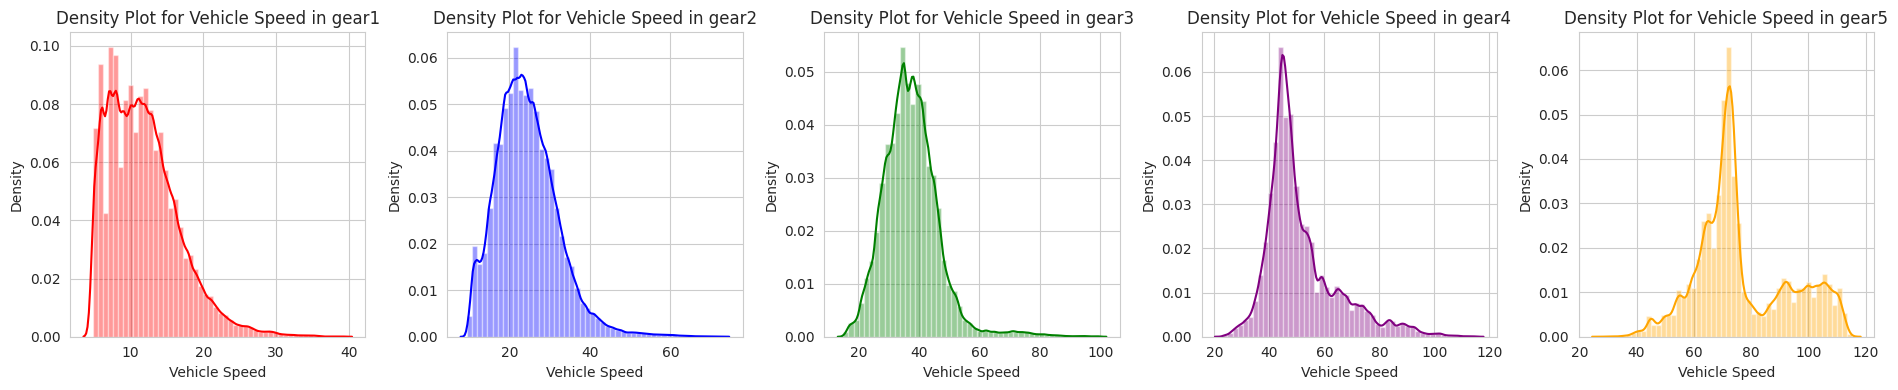

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into the 'df' DataFrame
# Replace this line with your data loading code
# df = pd.read_csv('your_data.csv')

# Define the range of classes from 1 to 5
class_range = range(1, 6)
class_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Create subplots in a single line
fig, axes = plt.subplots(1, len(class_range), figsize=(19, 4))

for class_num, color, ax in zip(class_range, class_colors, axes):

    # Filter the data for the current class
    class_data = df[df['SHIFT'] == class_num]

    # Create a density plot for 'Vehicle Speed' in the current class
    sns.set_style("whitegrid")
    sns.set_color_codes("dark")
    sns.distplot(a=class_data['Vehicle Speed'], color=color, hist_kws={"edgecolor": 'white'}, ax=ax)

    # Set plot labels and title
    ax.set_xlabel('Vehicle Speed')
    ax.set_title(f'Density Plot for Vehicle Speed in gear{class_num}')

# Show the subplots
plt.tight_layout()
plt.show()


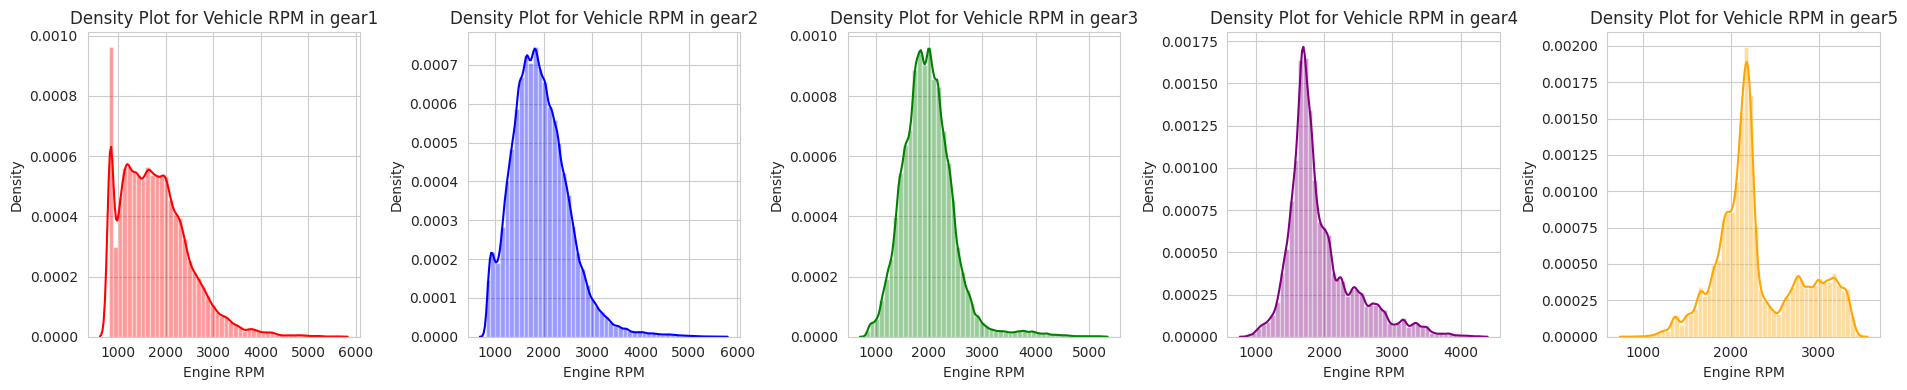

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into the 'df' DataFrame
# Replace this line with your data loading code
# df = pd.read_csv('your_data.csv')

# Define the range of classes from 1 to 5
class_range = range(1, 6)
class_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Create subplots in a single line
fig, axes = plt.subplots(1, len(class_range), figsize=(19, 4))

for class_num, color, ax in zip(class_range, class_colors, axes):

    # Filter the data for the current class
    class_data = df[df['SHIFT'] == class_num]

    # Create a density plot for 'Vehicle Speed' in the current class
    sns.set_style("whitegrid")
    sns.set_color_codes("dark")
    sns.distplot(a=class_data['Engine RPM'], color=color, hist_kws={"edgecolor": 'white'}, ax=ax)

    # Set plot labels and title
    ax.set_xlabel('Engine RPM')
    ax.set_title(f'Density Plot for Vehicle RPM in gear{class_num}')

# Show the subplots
plt.tight_layout()
plt.show()
